In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
columns = df.columns
columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

# Let's visualize the data to gain information 

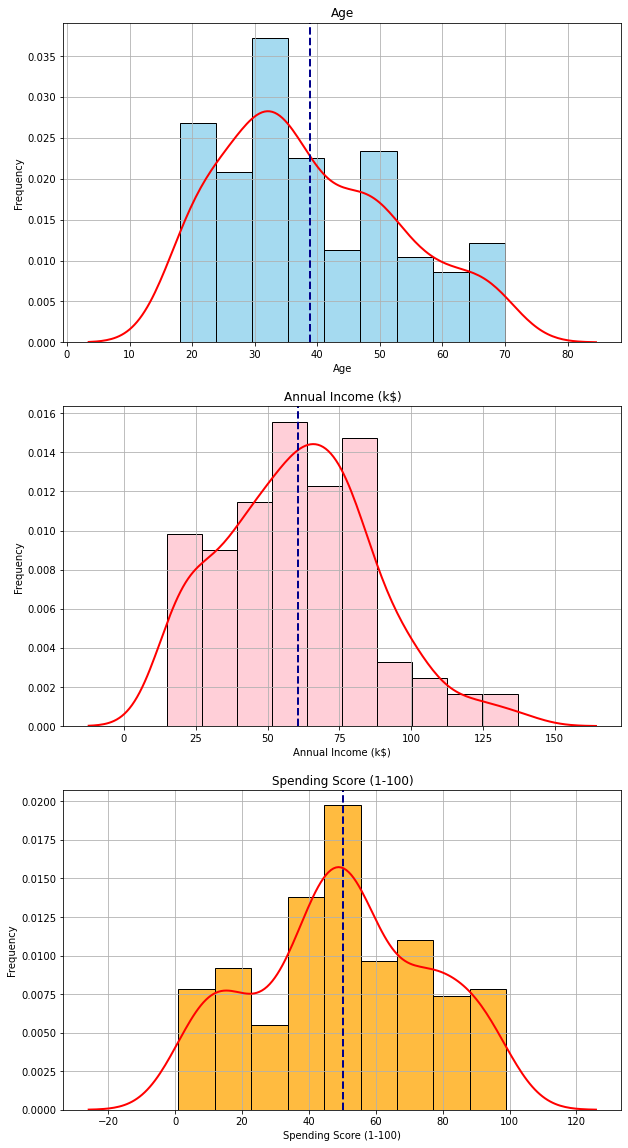

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(10, 20))
cols = [ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
colors = ['skyblue', 'pink', 'orange']
for i, col in enumerate(cols) :
    sns.histplot(data=df[col], color=colors[i], ax=axs[i],stat="density")
    sns.kdeplot(data=df[col], color='red',linewidth=2, ax=axs[i])
    #axs[i].hist(df[col], bins=15, color=colors[i], rwidth=0.99 ,edgecolor='black', linewidth=1)
    axs[i].axvline(x=df[col].mean(),color='darkblue', linestyle='--', linewidth=2)
    axs[i].set_title(col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)
plt.show()

Text(0, 0.5, 'Count')

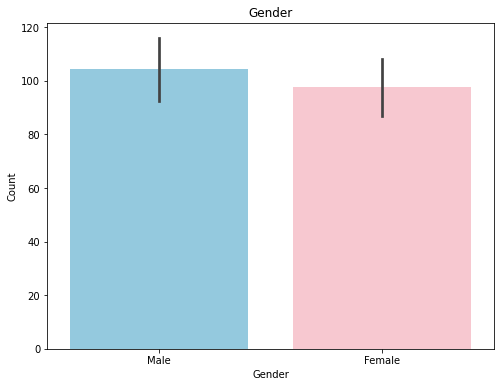

In [7]:
plt.figure(figsize=(8, 6))
sns.barplot(y=df['CustomerID'], x=df['Gender'],palette=['skyblue','pink'])
plt.title('Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

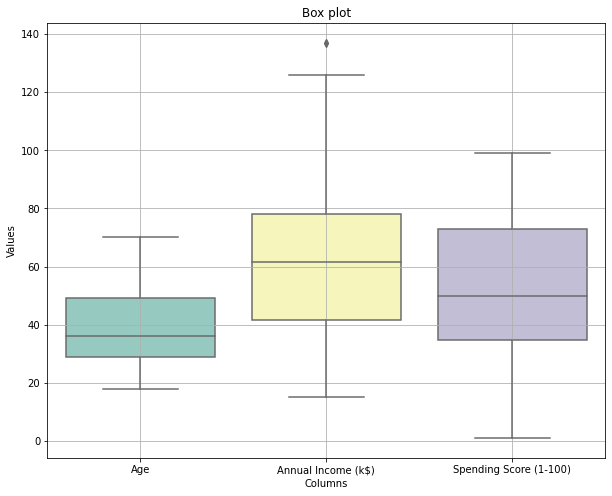

In [8]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df.drop(['CustomerID'],axis=1), palette='Set3')
plt.title('Box plot')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(True)

In [9]:
co = df.drop(['CustomerID'],axis=1).corr()
co

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


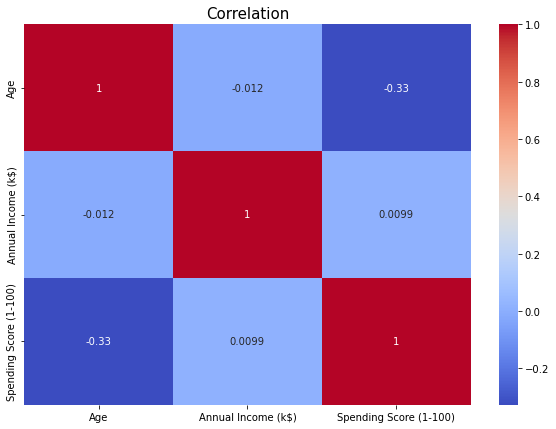

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(co,annot=True,cmap='coolwarm')
plt.title('Correlation',fontsize=15)
plt.show()

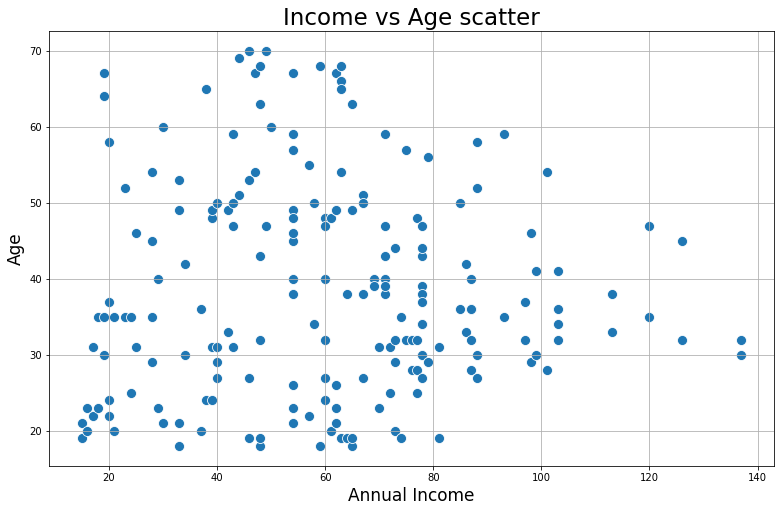

In [11]:
plt.figure(figsize=(13,8))
sns.scatterplot(data=df,x=df['Annual Income (k$)'], y=df['Age'],s=100)
plt.xlabel('Annual Income',fontsize=17)
plt.ylabel('Age',fontsize=17)
plt.title('Income vs Age scatter',fontsize=23)
plt.grid(True)

In [12]:
lb = LabelBinarizer()
df['Gender'] = lb.fit_transform(df['Gender'])
df['Gender']  = df['Gender'].astype(int)

In [13]:
df.dtypes

CustomerID                int64
Gender                    int32
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [14]:
miss = df.isnull().sum()
miss[0:5]

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df=df.drop(["CustomerID"],axis=1)
columns = df.columns

In [16]:
df = MinMaxScaler().fit_transform(df)
df = pd.DataFrame(df,columns=columns)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0.0,0.326923,0.860656,0.795918
196,0.0,0.519231,0.909836,0.275510
197,1.0,0.269231,0.909836,0.744898
198,1.0,0.269231,1.000000,0.173469


In [17]:
np.cov(df.T)

array([[ 0.24763819,  0.00813684,  0.00604333, -0.00761973],
       [ 0.00813684,  0.07216463, -0.00071702, -0.0231633 ],
       [ 0.00604333, -0.00071702,  0.04634746,  0.00056178],
       [-0.00761973, -0.0231633 ,  0.00056178,  0.06943506]])

In [18]:
PCA?

In [19]:
pca = PCA(n_components=3,
          whiten= True,
          svd_solver='randomized',
          random_state=42
         )

In [20]:
pca.fit(df)

PCA(n_components=3, random_state=42, svd_solver='randomized', whiten=True)

In [21]:
pca_d = pca.fit_transform(df)
pca_d.shape

(200, 3)

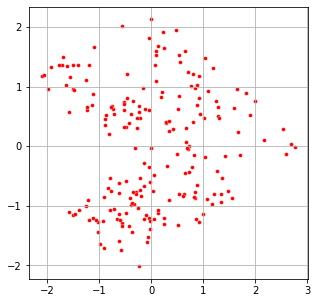

In [22]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=pca_d,x=pca_d[:,2],y=pca_d[:,1],s=15,color='red')
plt.grid(True)

In [23]:
KMeans?

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
SSE=[]
for toto in range (1,16):
    kmeans = KMeans(n_clusters=toto,
               init='random',
               n_init=15,
               max_iter=300,
               random_state=30,
              )
    kmeans.fit(pca_d)
    SSE.append(kmeans.inertia_)

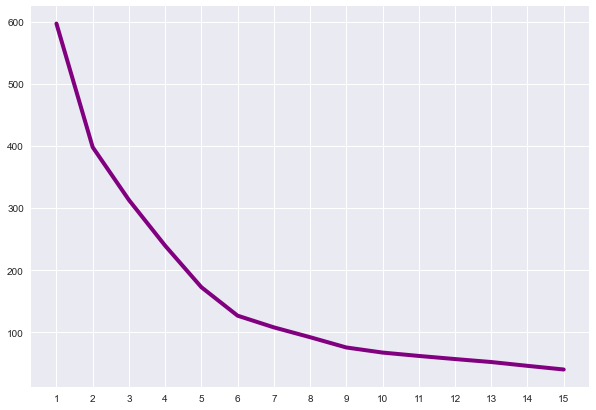

In [26]:
plt.figure(figsize=(10,7))
plt.style.use('seaborn')
plt.plot(range(1,16),SSE,color='purple', linewidth=4)
plt.xticks(range(1, 16))
plt.grid(True)

In [27]:
kmean = KMeans(n_clusters=5,
               init='k-means++',
               n_init=15,
               max_iter=300,
               random_state=30,
               algorithm="elkan"
              )

In [28]:
kmean.fit(pca_d)

KMeans(algorithm='elkan', n_clusters=5, n_init=15, random_state=30)

In [29]:
kmean.n_iter_

7

In [30]:
kmean.inertia_

172.52244418350625

يخرابي

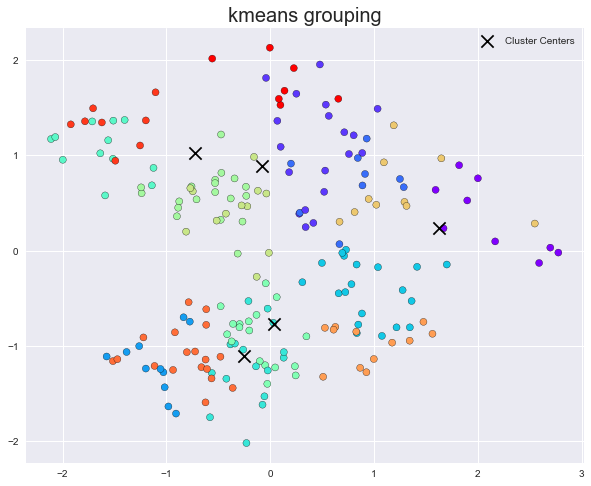

In [31]:
x = kmean.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(pca_d[:, 2], pca_d[:, 1], c=kmeans.predict(pca_d), cmap='rainbow', edgecolors='black')
plt.scatter(x[:, 2], x[:, 1], c='black', marker='x', s=150, label='Cluster Centers')
plt.title('kmeans grouping',fontsize=20)
plt.legend()

In [32]:
#try with n_components=2 in pca
pca_2 = PCA(n_components=2,
          whiten= True,
          svd_solver='randomized',
          random_state=42
         )
pca_2.fit(df)
pca_dd = pca_2.fit_transform(df)
kkmean = KMeans(n_clusters=6,
               init='k-means++',
               n_init=15,
               max_iter=300,
               random_state=30,
               algorithm="elkan"
              )
kkmean.fit(pca_dd)

KMeans(algorithm='elkan', n_clusters=6, n_init=15, random_state=30)

In [33]:
kkmean.inertia_

20.191235194086612

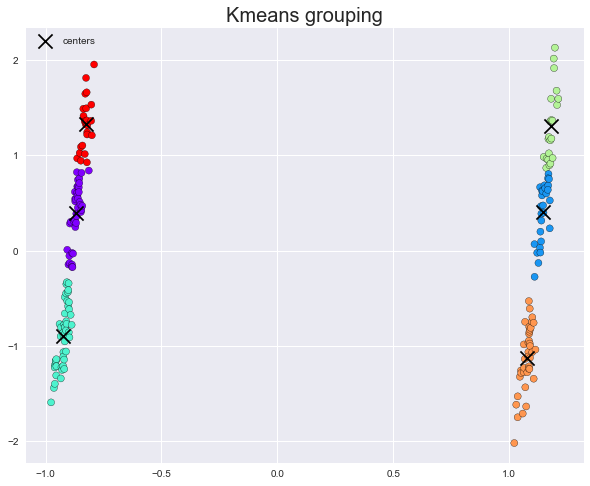

In [34]:
x = kkmean.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(pca_dd[:, 0], pca_dd[:, 1], c=kkmean.predict(pca_dd), cmap='rainbow', edgecolors='black')
plt.scatter(x[:, 0], x[:, 1], c='black', marker='x', s=200, label='centers')
plt.title('Kmeans grouping',fontsize=20)
plt.legend()